Task 1. Data Preparation

Task 1.1: Import the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feedback=pd.read_csv("customer_feedback_data.csv")

In [3]:
Metadata=pd.read_csv("customer_metadata_data.csv")

In [4]:
Info=pd.read_csv("product_information_data.csv")

Task 1.2: Inspect and clean the data, addressing any missing or inconsistent values.

In [5]:
Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    1000 non-null   object 
 1   Product_Name  1000 non-null   object 
 2   Category      1000 non-null   object 
 3   Price         1000 non-null   float64
 4   Manufacturer  1000 non-null   object 
 5   Launch_Date   1000 non-null   object 
 6   Description   1000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 54.8+ KB


In [6]:
Info.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
Metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_ID        50000 non-null  object
 1   Name               50000 non-null  object
 2   Age                50000 non-null  int64 
 3   Gender             50000 non-null  object
 4   Location           50000 non-null  object
 5   Date_of_Birth      50000 non-null  object
 6   Registration_Date  50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [8]:
Metadata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [9]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Feedback_ID      100000 non-null  object
 1   Customer_ID      100000 non-null  object
 2   Product_ID       100000 non-null  object
 3   Feedback_Type    100000 non-null  object
 4   Feedback_Date    100000 non-null  object
 5   Rating           100000 non-null  int64 
 6   Comment          100000 non-null  object
 7   Sentiment_Label  100000 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [10]:
feedback.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

Task 2.1: Merge datasets on relevant columns (e.g., Customer_ID in customer metadata with Customer_ID in customer feedback, and Product_ID in product information with Product_ID in customer feedback).

In [11]:
Data1=Metadata.merge(feedback, on="Customer_ID")

In [12]:
Data2=Info.merge(feedback,on="Product_ID")

In [13]:
Data1

,Customer_ID,Name,Age,Gender,Location,Date_of_Birth,Registration_Date,Feedback_ID,Product_ID,Feedback_Type,Feedback_Date,Rating,Comment,Sentiment_Label
0,C00000001,Michelle Cordova,52,Female,Kennethville,1982-03-15,2021-10-10,F00020052,P00000619,Survey,2024-07-18,1,Attorney remain than second some notice order ...,Negative
1,C00000003,Robin Gomez,19,Male,Erinfort,2000-10-21,2020-01-21,F00015054,P00000426,Email,2024-07-17,3,Truth goal girl task people collection goal sa...,Positive
2,C00000004,Benjamin Brooks,37,Female,Galvanville,1972-05-28,2021-01-26,F00025687,P00000267,Social Media,2024-05-14,4,State better point provide nearly live room ea...,Neutral
3,C00000004,Benjamin Brooks,37,Female,Galvanville,1972-05-28,2021-01-26,F00037995,P00000664,Social Media,2024-03-11,3,Off safe beautiful example meeting once energy...,Positive
4,C00000004,Benjamin Brooks,37,Female,Galvanville,1972-05-28,2021-01-26,F00038358,P00000340,Email,2024-05-04,5,Each fish but nice grow indicate message actio...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,C00049999,Kim Sanders,43,Male,New Mathewchester,1957-03-16,2020-02-11,F00005009,P00000390,Social Media,2024-02-12,1,Good wear contain want lay sometimes recognize...,Neutral
99996,C00049999,Kim Sanders,43,Male,New Mathewchester,1957-03-16,2020-02-11,F00033452,P00000857,Survey,2024-07-15,1,Indicate somebody check buy fast on ok this dr...,Negative
99997,C00050000,Steven Lambert,50,Female,East Georgetown,1967-10-31,2022-09-26,F00017250,P00000571,Social Media,2024-04-18,2,Agent might wide far few decade long discussio...,Negative
99998,C00050000,Steven Lambert,50,Female,East Georgetown,1967-10-31,2022-09-26,F00041464,P00000602,Social Media,2024-02-10,1,Available rule method important poor choose th...,Positive


In [14]:
Data2

,Product_ID,Product_Name,Category,Price,Manufacturer,Launch_Date,Description,Feedback_ID,Customer_ID,Feedback_Type,Feedback_Date,Rating,Comment,Sentiment_Label
0,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00000247,C00038556,Email,2024-08-24,1,Adult soldier consider lay one down room publi...,Neutral
1,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00001204,C00007699,Email,2024-05-13,3,Cut heavy throw health clear discuss activity ...,Positive
2,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00002206,C00048182,Social Media,2024-03-14,1,Hair piece physical key especially writer call...,Neutral
3,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00002595,C00036559,Email,2024-06-30,3,Stage choose ok follow effect new somebody dog...,Neutral
4,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00004979,C00048283,Email,2024-03-31,1,Culture artist pattern write heavy serious ind...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00091835,C00015183,Survey,2024-06-11,3,Record compare policy too task history door mi...,Positive
99996,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00093938,C00002033,Email,2024-07-20,3,Cultural knowledge issue page health maybe sig...,Neutral
99997,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00095707,C00008017,Social Media,2024-04-28,4,Recent argue source from card their wall produ...,Neutral
99998,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00097954,C00026535,Social Media,2024-06-12,3,Soldier employee hotel morning major particula...,Positive


Task 3.1: Sentiment Distribution Analysis

Analyze the distribution of sentiment labels (Positive, Neutral, Negative) across different feedback types and products.

In [15]:
df=Data2.filter(items=["Product_Name","Feedback_Type","Sentiment_Label"])

In [16]:
df

,Product_Name,Feedback_Type,Sentiment_Label
0,Those,Email,Neutral
1,Those,Email,Positive
2,Those,Social Media,Neutral
3,Those,Email,Neutral
4,Those,Email,Negative
...,...,...,...
99995,Anyone,Survey,Positive
99996,Anyone,Email,Neutral
99997,Anyone,Social Media,Neutral
99998,Anyone,Social Media,Positive


In [17]:
feedback_type_sentiment = df['Sentiment_Label'].value_counts(normalize=True)*100

In [18]:
product_sentiment = df.groupby('Product_Name')['Sentiment_Label'].value_counts(normalize=True) * 100

In [19]:
print("Sentiment Distribution by Feedback Type:")
print(feedback_type_sentiment)
print("\nSentiment Distribution by Product:")
print(product_sentiment)

Sentiment Distribution by Feedback Type:
Sentiment_Label
Neutral     33.366
Positive    33.319
Negative    33.315
Name: proportion, dtype: float64

Sentiment Distribution by Product:
Product_Name  Sentiment_Label
A             Neutral            39.325843
              Negative           32.022472
              Positive           28.651685
Ability       Positive           36.448598
              Negative           33.644860
                                   ...    
Young         Negative           34.158416
              Neutral            31.188119
Yourself      Negative           34.871795
              Positive           32.820513
              Neutral            32.307692
Name: proportion, Length: 1818, dtype: float64


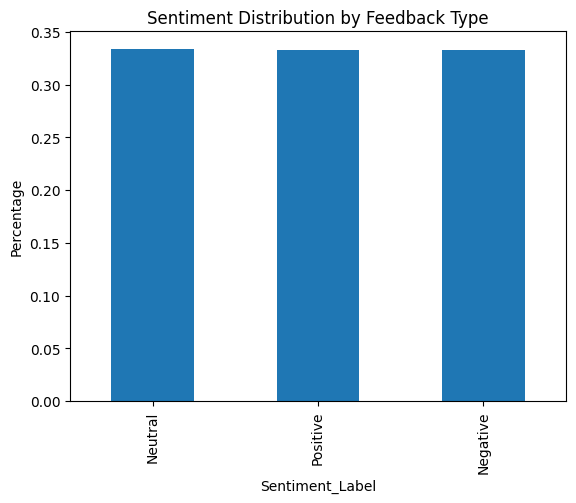

In [20]:
df['Sentiment_Label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Sentiment Distribution by Feedback Type')
plt.xlabel('Sentiment_Label')
plt.ylabel('Percentage')
plt.show()

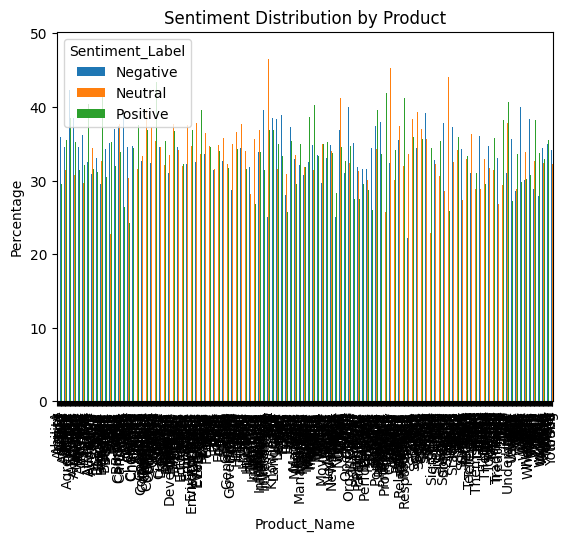

<Figure size 8000x4000 with 0 Axes>

In [21]:
product_sentiment.unstack().plot(kind='bar')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product_Name')
plt.ylabel('Percentage')
plt.figure(figsize=(20,10),dpi=400)
plt.show()


Task 3.2: Feedback Analysis

Perform natural language processing (NLP) to extract insights from the feedback comments, such as common themes or keywords.

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import string

In [23]:
feedback_comments = [
    "Term paper differentexpect old speech of patt...",
    "Smile use place cut outside medical stop identify",
    "Determine ground point staff speech degree tra",
    "Theory use main finish ball office maintain se",
    "Join threat check certain popular him we sever",
    "Head require paper article several significant",
  
    "Letter have tell like believe read attorney th",
	
]

In [24]:
stop_words=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(word)
        for comment in feedback_comments 
        for word in word_tokenize(comment)
         if word.isalpha() and word.lower() not in stop_words ]

In [25]:
common_themes=Counter(tokens).most_common(10)
keyword =[word for word,freq in common_themes if freq>1]

In [26]:
print("Common_themes:") 
for word, freq  in common_themes:
    print(f"{word}:{freq}")

Common_themes:
paper:2
speech:2
use:2
Term:1
differentexpect:1
old:1
patt:1
Smile:1
place:1
cut:1


In [27]:
print(" Keywords:")
print(keyword)

 Keywords:
['paper', 'speech', 'use']


Task 3.3: Customer Demographics Impact

Examine how customer demographics (age, gender, location) influence sentiment and feedback.

In [28]:
df1=Data1.filter(items=["Age","Gender","Location","Sentiment_Label"])

In [29]:
df1

,Age,Gender,Location,Sentiment_Label
0,52,Female,Kennethville,Negative
1,19,Male,Erinfort,Positive
2,37,Female,Galvanville,Neutral
3,37,Female,Galvanville,Positive
4,37,Female,Galvanville,Negative
...,...,...,...,...
99995,43,Male,New Mathewchester,Neutral
99996,43,Male,New Mathewchester,Negative
99997,50,Female,East Georgetown,Negative
99998,50,Female,East Georgetown,Positive


Group by demographic and calculate sentiment counts

In [30]:
age_sentiment=df1.groupby(["Age","Sentiment_Label"]).size()
gender_sentiment=df1.groupby(["Gender","Sentiment_Label"]).size()
location_sentiment=df1.groupby(["Location","Sentiment_Label"]).size()

In [31]:
print("Sentiment Distribution by Age:  ")
print(age_sentiment)
print("\nSentiment Distributon by Gender:  ")
print(gender_sentiment)
print("\nSentiment Distribution by Location:  ")
print(location_sentiment)

Sentiment Distribution by Age:  
Age  Sentiment_Label
18   Negative           657
     Neutral            661
     Positive           687
19   Negative           652
     Neutral            689
                       ... 
68   Neutral            655
     Positive           680
69   Negative           636
     Neutral            638
     Positive           600
Length: 156, dtype: int64

Sentiment Distributon by Gender:  
Gender  Sentiment_Label
Female  Negative           16646
        Neutral            16648
        Positive           16583
Male    Negative           16669
        Neutral            16718
        Positive           16736
dtype: int64

Sentiment Distribution by Location:  
Location      Sentiment_Label
Aaronberg     Negative           4
              Positive           2
Aaronborough  Neutral            2
              Positive           3
Aaronburgh    Negative           5
                                ..
Zoemouth      Negative           1
              Positive     

Visulize the Results

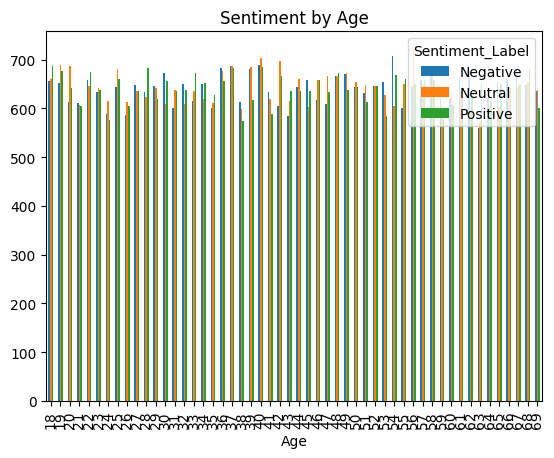

In [32]:
age_sentiment.unstack().plot(kind="bar")
plt.title("Sentiment by Age")
plt.show()

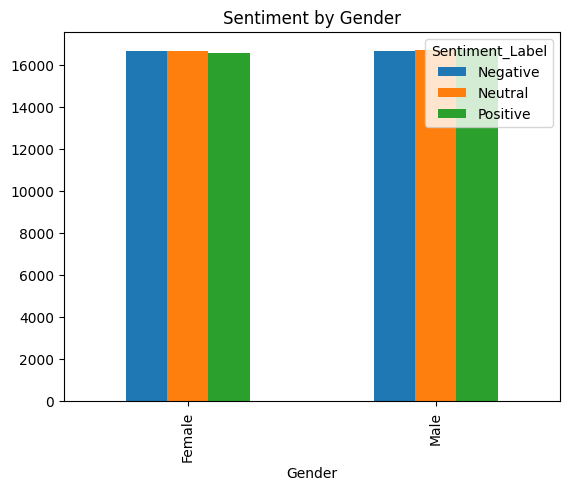

In [33]:
gender_sentiment.unstack().plot(kind="bar")
plt.title("Sentiment by Gender")
plt.show()

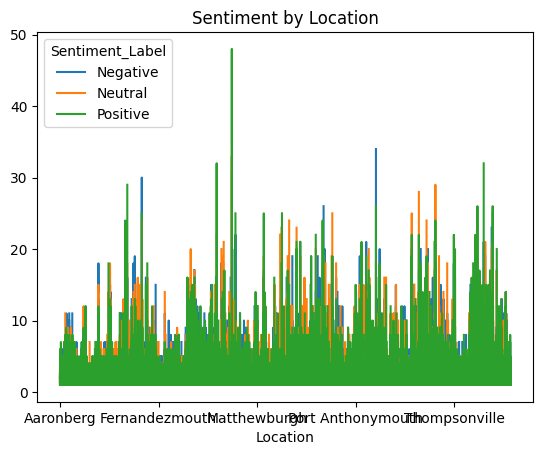

In [34]:
location_sentiment.unstack().plot(kind="line")
plt.title("Sentiment by Location")
plt.show()

Task 3.4: Product/Service Analysis

Assess feedback sentiment related to different products/services and identify trends or issues.

In [35]:
Data2

,Product_ID,Product_Name,Category,Price,Manufacturer,Launch_Date,Description,Feedback_ID,Customer_ID,Feedback_Type,Feedback_Date,Rating,Comment,Sentiment_Label
0,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00000247,C00038556,Email,2024-08-24,1,Adult soldier consider lay one down room publi...,Neutral
1,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00001204,C00007699,Email,2024-05-13,3,Cut heavy throw health clear discuss activity ...,Positive
2,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00002206,C00048182,Social Media,2024-03-14,1,Hair piece physical key especially writer call...,Neutral
3,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00002595,C00036559,Email,2024-06-30,3,Stage choose ok follow effect new somebody dog...,Neutral
4,P00000001,Those,Electronics,357.11,"Warren, Duncan and Carlson",2020-02-29,Between have film increase across no speech kn...,F00004979,C00048283,Email,2024-03-31,1,Culture artist pattern write heavy serious ind...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00091835,C00015183,Survey,2024-06-11,3,Record compare policy too task history door mi...,Positive
99996,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00093938,C00002033,Email,2024-07-20,3,Cultural knowledge issue page health maybe sig...,Neutral
99997,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00095707,C00008017,Social Media,2024-04-28,4,Recent argue source from card their wall produ...,Neutral
99998,P00001000,Anyone,Electronics,874.98,White and Sons,2022-03-10,Response little some animal mention mean it so...,F00097954,C00026535,Social Media,2024-06-12,3,Soldier employee hotel morning major particula...,Positive


In [36]:
Data2.filter(items=["Product_Name","Feedback_Type","Rating"])

,Product_Name,Feedback_Type,Rating
0,Those,Email,1
1,Those,Email,3
2,Those,Social Media,1
3,Those,Email,3
4,Those,Email,1
...,...,...,...
99995,Anyone,Survey,3
99996,Anyone,Email,3
99997,Anyone,Social Media,4
99998,Anyone,Social Media,3


In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [38]:
feedback_data={
    "Those":["Email","1"],
    "Anyone":["Survey","3"],
    "Worker":["Social Media","1"]
}

In [39]:
sia=SentimentIntensityAnalyzer()
sentiments={}
for product, feedback in feedback_data.items():
    sentiments[product]=[sia.polarity_scores(text)['compound']for text in feedback]


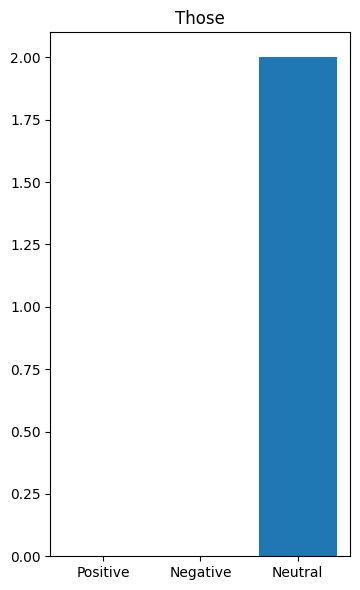

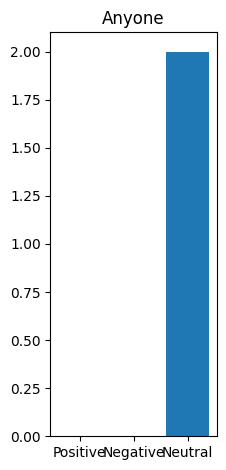

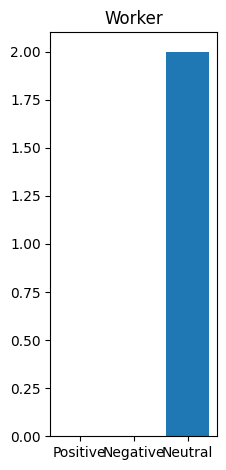

In [40]:
#trend Identification
plt.figure(figsize=(10,6))
for i, (product, sentiment) in enumerate(sentiments.items()):
    plt.subplot(1,len(sentiments),i+1)
    plt.bar(["Positive","Negative","Neutral"],
[sum(1 for s in sentiment if s>0.05),
 sum(1 for s in sentiment if s <-0.05),
 sum(1 for s in sentiment if abs(s)<=0.05)])
    plt.title(product)
    plt.tight_layout()
    plt.show()


Task 3.5: Time Series Analysis

Investigate changes in sentiment over time and how feedback trends evolve.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from nltk import download 


In [42]:
download("vander_lexicon")

[nltk_data] Error loading vander_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [43]:
feedback

['Social Media', '1']

Convert timestamp to datetime

In [44]:
feedback["Feedback_Date"]=pd.to_datetime(feedback["Feedback_Date"]) 

TypeError: list indices must be integers or slices, not str

In [ ]:
#Sort Data
feedback.sort_values(by="Feedback_Date",inplace=True) 

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
feedback["Sentiment_Label"]=feedback["Comment"].apply(lambda x:sia.polarity_scores(x))

TypeError: unhashable type: 'dict'

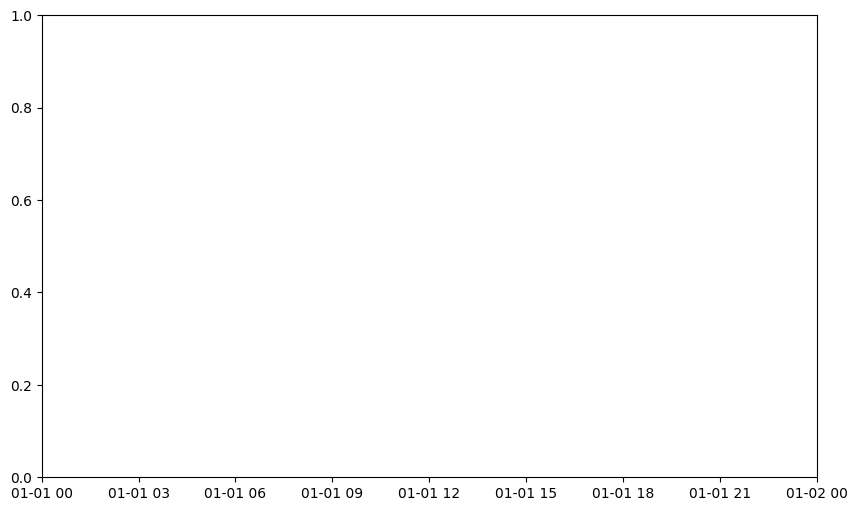

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(feedback['Feedback_Date'],feedback["Sentiment_Label"])
plt.xlabel("Time")
plt.ylabel("sentiment")
plt.title("Sentiment Over Time")
plt.show()

In [ ]:
decomposition=seasonal_decompose(feedback["Sentiment_Label"])

TypeError: float() argument must be a string or a real number, not 'dict'

In [ ]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

NameError: name 'decomposition' is not defined